In [56]:
# 기본 패키지 불러오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '../../../../data/malgun.ttf'  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

In [57]:
# 데이터 불러오기

path = '../../../../data/Airbnb_London/reviews.csv'

df = pd.read_csv(path, encoding='ANSI')

C:\Users\Master\AppData\Local\Temp\ipykernel_15064\2046616601.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='ANSI')


In [58]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770.0,2010-08-18,177109.0,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568.0,2011-07-11,19835707.0,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579.0,2011-09-13,1110304.0,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481.0,2011-10-03,1216358.0,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947.0,2011-10-09,490840.0,Jorik,"Nice location in Islington area, good for shor..."


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   listing_id     1048575 non-null  object 
 1   id             1033828 non-null  float64
 2   date           1033828 non-null  object 
 3   reviewer_id    1033828 non-null  float64
 4   reviewer_name  1033828 non-null  object 
 5   comments       1033671 non-null  object 
dtypes: float64(2), object(4)
memory usage: 48.0+ MB


In [60]:
df.shape

(1048575, 6)

In [61]:
df.isna().sum()

listing_id           0
id               14747
date             14747
reviewer_id      14747
reviewer_name    14747
comments         14904
dtype: int64

In [62]:
#date >> 데이터타입 변경 datatime 

df['date'] = pd.to_datetime(df['date'])
df.dtypes

listing_id               object
id                      float64
date             datetime64[ns]
reviewer_id             float64
reviewer_name            object
comments                 object
dtype: object

"br/"은 줄바꿈이라는 뜻 

In [63]:
df['listing_id'].value_counts()

listing_id
<br/>                                                                                                                   4390
30760930                                                                                                                1672
19670926                                                                                                                1361
1436172                                                                                                                 1080
2126708                                                                                                                 1011
                                                                                                                        ... 
<br/>Very convenient buses and the food down the road at Haminados had us coming back for more time and time again.        1
<br/>The apartment had everything we needed and we would definitely stay again - Thank you Agos!                  

일단 br/만 있는 값 제거 하자 

In [64]:
condition = df['listing_id'] == '<br/>'
df.drop(df[condition].index, inplace=True)

In [65]:
df.shape

(1044185, 6)

listing_id에서 'br/' 를 포함하고 있는 데이터 추출 >> row_br 

In [66]:
row_br = df['listing_id'].str.contains('<br/>',na=False)
row_br

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Name: listing_id, Length: 1044185, dtype: bool

br/을 포함하고 있는 데이터는 리뷰내용이다 >> comments컬럼으로 옮기자 

In [67]:
df.loc[row_br, 'comments'] = df.loc[row_br, 'listing_id']

In [68]:
df[df['listing_id'].str.contains('<br/>',na=False)]

,listing_id,id,date,reviewer_id,reviewer_name,comments
80,<br/>Melanie Brown,NaN,NaT,NaN,NaN,<br/>Melanie Brown
118,<br/>Clean-Location -and Pippa assistance was ...,NaN,NaT,NaN,NaN,<br/>Clean-Location -and Pippa assistance was ...
143,<br/>my first experience with Airbnb effortles...,NaN,NaT,NaN,NaN,<br/>my first experience with Airbnb effortles...
144,<br/>was accommodating and welcomed me to the ...,NaN,NaT,NaN,NaN,<br/>was accommodating and welcomed me to the ...
145,<br/>has more than enough privacy for those wa...,NaN,NaT,NaN,NaN,<br/>has more than enough privacy for those wa...
...,...,...,...,...,...,...
527969,<br/>Thanks to them!,NaN,NaT,NaN,NaN,<br/>Thanks to them!
533554,<br/>Petit b?mol en ce qui concerne la station...,NaN,NaT,NaN,NaN,<br/>Petit b?mol en ce qui concerne la station...
533556,<br/>,NaN,NaT,NaN,NaN,<br/>
534490,<br/>The only part that it is a little bit inc...,NaN,NaT,NaN,NaN,<br/>The only part that it is a little bit inc...


옮기고나서 listing_id값을 널값으로 바꾸자 

In [69]:
df.loc[row_br, 'listing_id'] = np.nan

In [70]:
df[df['comments'].str.contains('<br/>',na=False)]

,listing_id,id,date,reviewer_id,reviewer_name,comments
5,13913,4.847959e+06,2013-05-28,6405442.0,Vera,I'm very happy to have been Alina's guest! We'...
9,13913,4.666957e+07,2015-09-12,42970248.0,Oleh,Alina's flat is exceptional one. \r<br/>I hav...
23,13913,6.290000e+17,2022-05-17,32486646.0,Saarah,"Alina's flat is lovely and quirky, with art al..."
25,13913,6.320000e+17,2022-05-22,172968198.0,Ged,"Alina was very welcoming, friendly and helpfu..."
35,13913,7.290000e+17,2022-10-02,12977653.0,Mateusz,Everything was fine! Strongly recommended :)<b...
...,...,...,...,...,...,...
1048556,39070453,9.960000e+17,2023-10-06,451803035.0,Aylin,"Die Lage des Airbnb war gut, um von der Haltes..."
1048562,39029180,7.570000e+17,2022-11-10,246486757.0,Liang,Fantastic location. Close to a lot of the attr...
1048566,39029180,1.040000e+18,2023-12-04,546533885.0,Rachel,Had a great stay :) Miche?l was super friendly...
1048569,39070453,1.020000e+18,2023-11-04,220208645.0,Kahinde,"Room was clean, but smelt of feet. One pillow ..."


In [71]:
df['listing_id'].isna().sum()

10355

In [72]:
df.isna().sum()

listing_id       10355
id               10357
date             10357
reviewer_id      10357
reviewer_name    10357
comments           159
dtype: int64

In [73]:
temp = df.copy()

<상의해야할 것 ><br>
1. 리뷰내용은 있는데 listing_id, id, date, reviewer_id, reviewer_name은 널값이다 >> 리뷰로만 분석할꺼니깐 살려놓기 <br>
2. 리뷰 내용은 있어도 리뷰를 쓴 작성자와 날짜도 중요하니깐 모두 있는 데이터로만 분석하자 >> 널값 제거 

일단 리뷰내용만 있는 행 제거함 

In [74]:
df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [75]:
df[df['listing_id'].isna() & df['id'].isna() & df['date'].isna() & df['reviewer_id'].isna() & df['reviewer_name'].isna()]

,listing_id,id,date,reviewer_id,reviewer_name,comments
80,NaN,NaN,NaT,NaN,NaN,<br/>Melanie Brown
118,NaN,NaN,NaT,NaN,NaN,<br/>Clean-Location -and Pippa assistance was ...
143,NaN,NaN,NaT,NaN,NaN,<br/>my first experience with Airbnb effortles...
144,NaN,NaN,NaT,NaN,NaN,<br/>was accommodating and welcomed me to the ...
145,NaN,NaN,NaT,NaN,NaN,<br/>has more than enough privacy for those wa...
...,...,...,...,...,...,...
527969,NaN,NaN,NaT,NaN,NaN,<br/>Thanks to them!
533554,NaN,NaN,NaT,NaN,NaN,<br/>Petit b?mol en ce qui concerne la station...
533556,NaN,NaN,NaT,NaN,NaN,<br/>
534490,NaN,NaN,NaT,NaN,NaN,<br/>The only part that it is a little bit inc...


In [76]:
condition_nan = df['listing_id'].isna() & df['id'].isna() & df['date'].isna() & df['reviewer_id'].isna() & df['reviewer_name'].isna()


In [77]:
df = df[~condition_nan]

In [78]:
df.isna().sum()

listing_id         0
id                 2
date               2
reviewer_id        2
reviewer_name      2
comments         159
dtype: int64

In [79]:
df = df[~(df['id'].isna())]

In [80]:
df.isna().sum()


listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         157
dtype: int64

리뷰내용이 없는것도 삭제하자 

In [81]:
df = df[~(df['comments'].isna())]

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1033671 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   listing_id     1033671 non-null  object        
 1   id             1033671 non-null  float64       
 2   date           1033671 non-null  datetime64[ns]
 3   reviewer_id    1033671 non-null  float64       
 4   reviewer_name  1033671 non-null  object        
 5   comments       1033671 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 55.2+ MB


br/ 을 포함하고 있는 리뷰 >> br/을 공백(띄어쓰기)로 변경

In [83]:
df[df['comments'].str.contains('<br/>')]

,listing_id,id,date,reviewer_id,reviewer_name,comments
5,13913,4.847959e+06,2013-05-28,6405442.0,Vera,I'm very happy to have been Alina's guest! We'...
9,13913,4.666957e+07,2015-09-12,42970248.0,Oleh,Alina's flat is exceptional one. \r<br/>I hav...
23,13913,6.290000e+17,2022-05-17,32486646.0,Saarah,"Alina's flat is lovely and quirky, with art al..."
25,13913,6.320000e+17,2022-05-22,172968198.0,Ged,"Alina was very welcoming, friendly and helpfu..."
35,13913,7.290000e+17,2022-10-02,12977653.0,Mateusz,Everything was fine! Strongly recommended :)<b...
...,...,...,...,...,...,...
1048556,39070453,9.960000e+17,2023-10-06,451803035.0,Aylin,"Die Lage des Airbnb war gut, um von der Haltes..."
1048562,39029180,7.570000e+17,2022-11-10,246486757.0,Liang,Fantastic location. Close to a lot of the attr...
1048566,39029180,1.040000e+18,2023-12-04,546533885.0,Rachel,Had a great stay :) Miche?l was super friendly...
1048569,39070453,1.020000e+18,2023-11-04,220208645.0,Kahinde,"Room was clean, but smelt of feet. One pillow ..."


In [84]:
df['comments'] = df['comments'].str.replace('<br/>', ' ', regex=False)

In [85]:
df[df['comments'].str.contains('<br/>')]

,listing_id,id,date,reviewer_id,reviewer_name,comments


In [86]:
df['comments']

0          My girlfriend and I hadn't known Alina before ...
1          Alina was a really good host. The flat is clea...
2          Alina is an amazing host. She made me feel rig...
3          Alina's place is so nice, the room is big and ...
4          Nice location in Islington area, good for shor...
                                 ...                        
1048570    Ubytovani za tyhle pen?ze adekvatni, jak p??st...
1048571                             It was a nice experience
1048572                              Good and easy to locate
1048573    This Airbnb in Kensington has a lot going for ...
1048574    Location, location, location... and very comfo...
Name: comments, Length: 1033671, dtype: object

listing_id 와 id, reviewer_id를 string 값으로 데이터타입 변경 

In [87]:
df['listing_id'] = df['listing_id'].astype(str)
df['id'] = df['id'].astype(str)
df['reviewer_id'] = df['reviewer_id'].astype(str)


In [88]:
df.dtypes

listing_id               object
id                       object
date             datetime64[ns]
reviewer_id              object
reviewer_name            object
comments                 object
dtype: object

EDA 분석

In [89]:
df['date'].dt.year

0          2010
1          2011
2          2011
3          2011
4          2011
           ... 
1048570    2023
1048571    2023
1048572    2024
1048573    2019
1048574    2019
Name: date, Length: 1033671, dtype: int32

작성년도별 리뷰수 파악

In [90]:
df.groupby(df['date'].dt.year)['comments'].count()

date
2009         1
2010        78
2011       703
2012      3282
2013      9847
2014     20139
2015     41113
2016     76214
2017    109464
2018    151929
2019    195353
2020     47250
2021     58893
2022    144721
2023    155184
2024     19500
Name: comments, dtype: int64

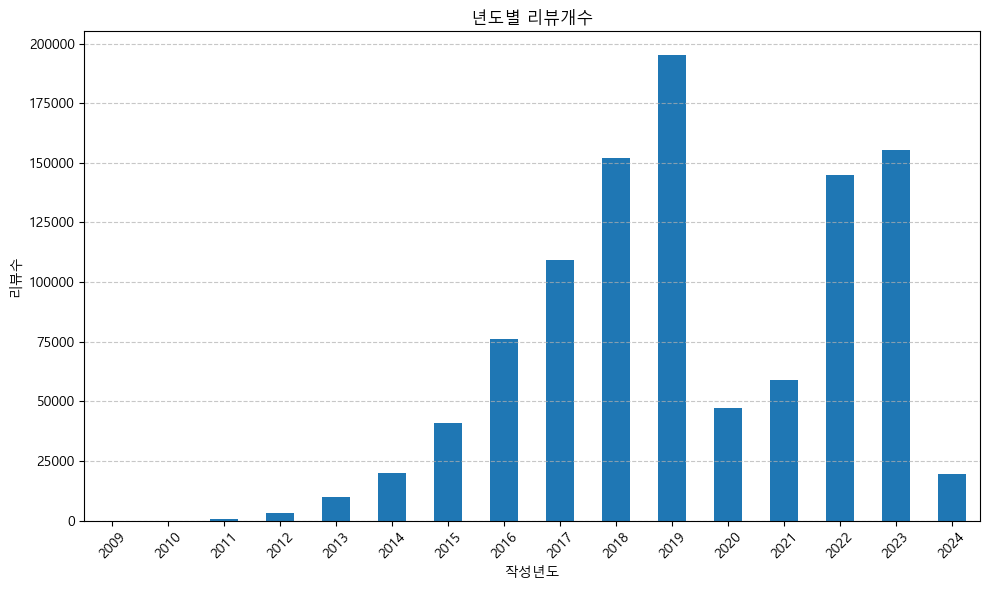

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

comments_by_year = df.groupby(df['date'].dt.year)['comments'].count()

comments_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('년도별 리뷰개수')
plt.xlabel('작성년도')
plt.ylabel('리뷰수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


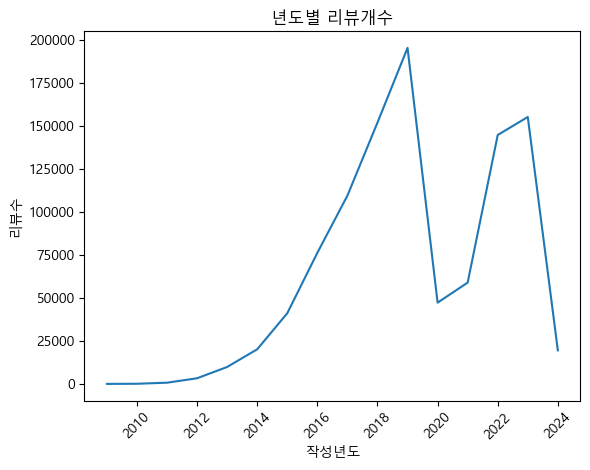

In [92]:
import koreanize_matplotlib


comments_by_year.sort_values(ascending=False)

 
x = comments_by_year.index #작성년도
y = comments_by_year.values #리뷰수

plt.plot(x,y)
plt.title('년도별 리뷰개수')
plt.xlabel('작성년도')
plt.ylabel('리뷰수')
plt.xticks(rotation=45)
plt.show()

숙소별 리뷰 수 시각화

In [93]:
df.groupby(df['listing_id'])['comments'].count()

listing_id
10006571      1
10008315     31
1000926      49
10009627      1
10010974      6
           ... 
9992799      20
9996526      21
999691      113
9997204       7
999835      136
Name: comments, Length: 26545, dtype: int64

In [94]:
comment_by_listing = df.groupby(df['listing_id'])['comments'].count()

숙소가 너무 많아서 10개만 시각화

In [95]:
comment_by_listing[:15]

listing_id
10006571      1
10008315     31
1000926      49
10009627      1
10010974      6
10014542      4
10014693     12
1002010       1
1002115     301
10026158      1
10026201      2
10027007      1
10027611      3
1002787     208
10029797     10
Name: comments, dtype: int64

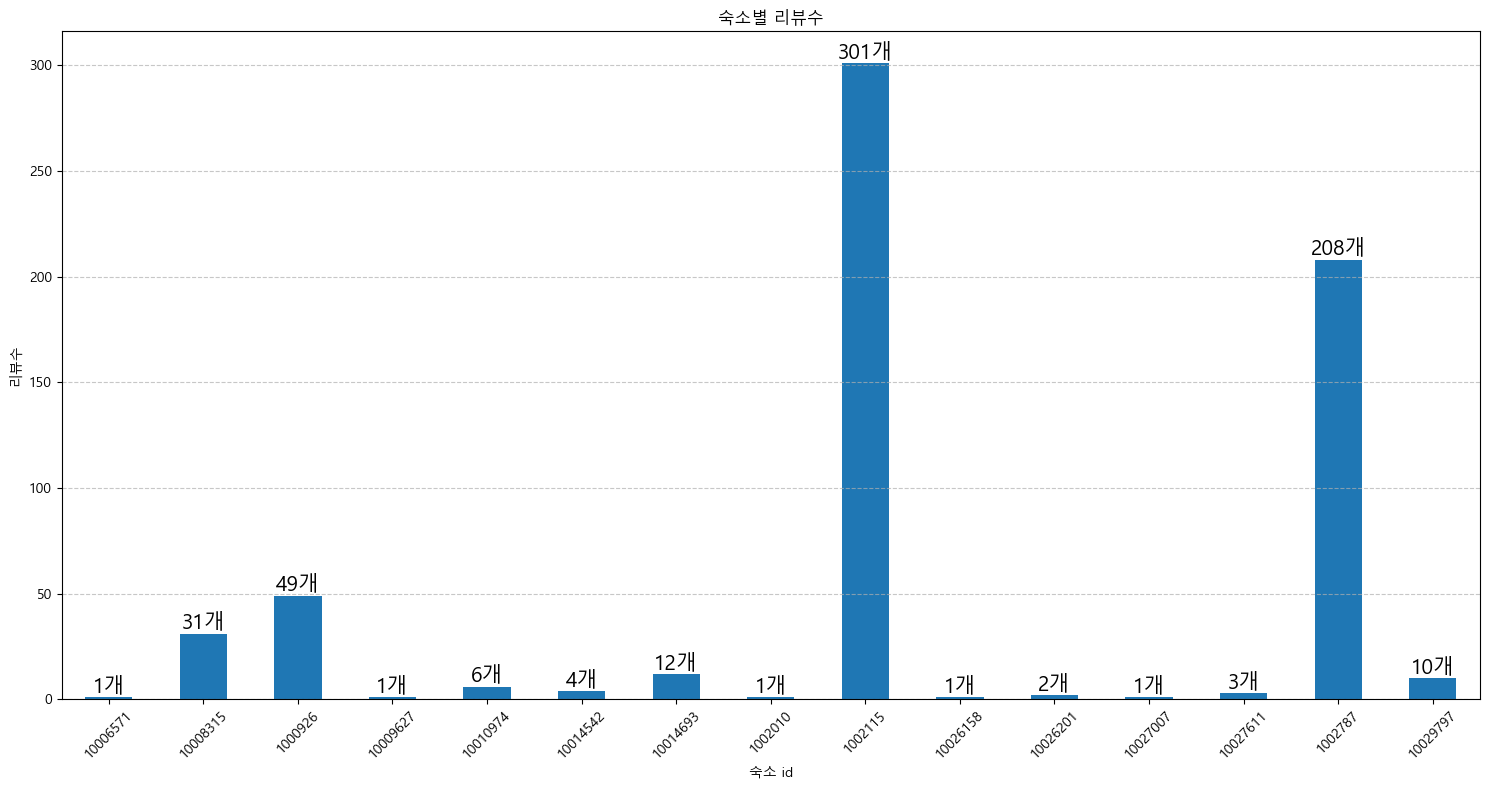

In [96]:
# 막대 그래프 (Bar Plot)
comment_by_listing[:15].plot(kind='bar', figsize=(15, 8))

for i, v in enumerate(comment_by_listing[:15]):
    plt.text(i, v, str(v)+ "개", ha='center', va='bottom', fontsize=15)

plt.title('숙소별 리뷰수')
plt.xlabel('숙소 id')
plt.ylabel('리뷰수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

숙소별 리뷰수를 데이터프레임화 하기

In [97]:
comment_by_listing_frame = comment_by_listing.to_frame().reset_index()
comment_by_listing_frame

,listing_id,comments
0,10006571,1
1,10008315,31
2,1000926,49
3,10009627,1
4,10010974,6
...,...,...
26540,9992799,20
26541,9996526,21
26542,999691,113
26543,9997204,7


In [98]:
comment_by_listing_frame.rename(columns={'comments' : 'comments_count'}, inplace=True)

In [99]:
comment_by_listing_frame

,listing_id,comments_count
0,10006571,1
1,10008315,31
2,1000926,49
3,10009627,1
4,10010974,6
...,...,...
26540,9992799,20
26541,9996526,21
26542,999691,113
26543,9997204,7


In [100]:
comment_by_listing_frame.describe()

,comments_count
count,26545.000000
mean,38.940328
std,66.687760
min,1.000000
25%,4.000000
50%,14.000000
75%,44.000000
max,1671.000000


리뷰수 개수별로 나눠보자

In [101]:
#리뷰수가 1000개가 넘는 숙소는 4개 뿐
comment_by_listing_frame[comment_by_listing_frame['comments_count'] >= 1000] 


,listing_id,comments_count
3071,1436172,1078
7538,19670926,1360
9176,2126708,1011
16434,30760930,1671


In [102]:
listing_1000 = comment_by_listing_frame[comment_by_listing_frame['comments_count'] >= 1000] 


In [103]:
#500개 이상 1000개 미만은 52개의 숙소 
comment_by_listing_frame[(comment_by_listing_frame['comments_count'] < 1000) & (comment_by_listing_frame['comments_count'] >= 500)]


,listing_id,comments_count
318,107051,691
1470,12596630,557
1712,1296836,559
2442,13713957,501
3017,14298552,569
3020,14299729,503
3021,14300513,596
3022,14300858,525
3072,1436177,908
3290,14628902,533


In [104]:
listing_500 = comment_by_listing_frame[(comment_by_listing_frame['comments_count'] < 1000) & (comment_by_listing_frame['comments_count'] >= 500)]


In [105]:
#100개이상 500개 미만 2693개 
comment_by_listing_frame[(comment_by_listing_frame['comments_count'] < 500) & (comment_by_listing_frame['comments_count'] >= 100)]



,listing_id,comments_count
8,1002115,301
13,1002787,208
19,1003616,280
24,1003867,148
25,1003956,163
...,...,...
26505,9938849,338
26516,995832,166
26534,998578,253
26542,999691,113


In [106]:
listing_100 =comment_by_listing_frame[(comment_by_listing_frame['comments_count'] < 500) & (comment_by_listing_frame['comments_count'] >= 100)]


In [107]:
#0개 이상 100개 미만  23796개 
comment_by_listing_frame[(comment_by_listing_frame['comments_count'] < 100) & (comment_by_listing_frame['comments_count'] >= 0)]



,listing_id,comments_count
0,10006571,1
1,10008315,31
2,1000926,49
3,10009627,1
4,10010974,6
...,...,...
26538,999147,86
26539,9992437,47
26540,9992799,20
26541,9996526,21


In [108]:
listing_0 =comment_by_listing_frame[(comment_by_listing_frame['comments_count'] < 100) & (comment_by_listing_frame['comments_count'] >= 0)]


In [109]:
listing_500

,listing_id,comments_count
318,107051,691
1470,12596630,557
1712,1296836,559
2442,13713957,501
3017,14298552,569
3020,14299729,503
3021,14300513,596
3022,14300858,525
3072,1436177,908
3290,14628902,533


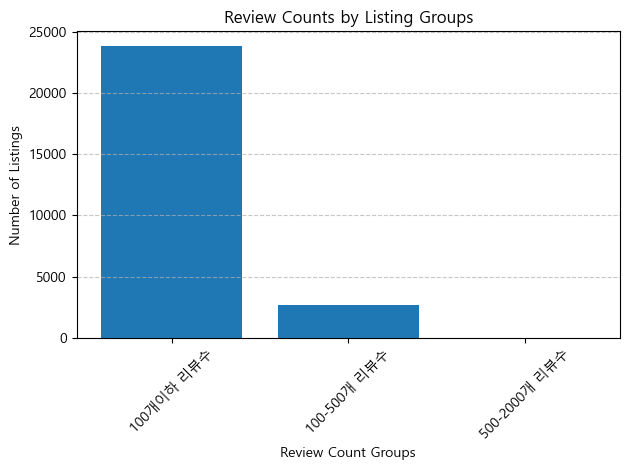

In [110]:
# 숙소를 리뷰 수에 따라 4가지 그룹으로 분류
comment_by_listing_frame['review_group'] = pd.cut(comment_by_listing_frame['comments_count'], bins=[-1, 100, 1000, float('inf')], labels=['100개이하 리뷰수', '100-500개 리뷰수', '500-2000개 리뷰수'])

# 각 그룹의 리뷰 수를 세어 시각화
review_counts = comment_by_listing_frame['review_group'].value_counts().sort_index()

# 그래프 그리기
plt.bar(review_counts.index, review_counts.values)
plt.title('Review Counts by Listing Groups')
plt.xlabel('Review Count Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

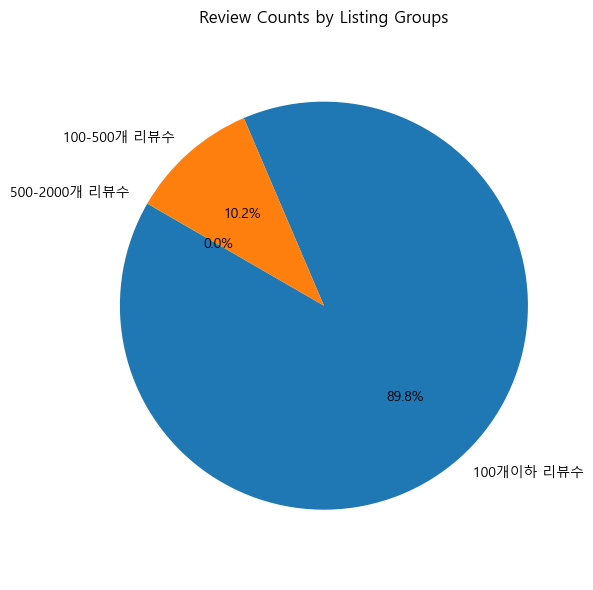

In [111]:
# 각 그룹의 리뷰 수를 세어 시각화
review_counts = comment_by_listing_frame['review_group'].value_counts().sort_index()

# 그래프 그리기 (파이 차트)
plt.figure(figsize=(6, 6))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', startangle=150)
plt.title('Review Counts by Listing Groups')
plt.axis('equal')  # 원형으로 보이도록 설정
plt.tight_layout()
plt.show()
